In [20]:
# imports
import numpy as np
import glob
from PIL import Image
from PIL import Image, ImageOps
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

In [21]:
# http://vision.ucsd.edu/content/yale-face-database
images = []
for f in glob.iglob('yalefaces/*'):
    print(f)     # [age]_[gender]_[race]_[date&time].jpg
    images.append(np.asarray(Image.open(f)))
    break

images = np.array(images)
print(images.shape)

yalefaces/subject12.glasses
(1, 243, 320)


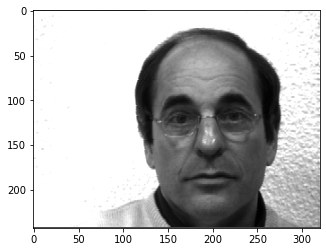

In [46]:
im1 = Image.open('yalefaces/subject12.glasses')

plt.imshow(np.array(im1), cmap='gray')

In [44]:
# split into train and test
# train: centerlight, glasses, happy, leftlight, noglasses, normal, rightlight, sad
# test: sleepy, surprised, and wink

train_imgs = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight', 'sad']
test_imgs = ['sleepy', 'surprised', 'wink']

train_data = []
test_data = []

images = []
for f in glob.iglob('yalefaces/*'):
    if f.split(".", 1)[1] in train_imgs:
        train_data.append(np.asarray(Image.open(f)))
    else:
        test_data.append(np.asarray(Image.open(f)))
        
train_data = np.array(train_data)
test_data = np.array(test_data)

In [45]:
print(train_data.shape)
print(test_data.shape)

(120, 243, 320)
(45, 243, 320)


5/27 to do next:
- need dataloader
- figure out if data is already centered (if not, how to do it for PCA)
- feature extraction (PCA)
- train our ELMAN RNN (link for how to use RNN with Pytorch: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch, https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)
- find optimal weights
- test
- try out other types of netral networks

Reference*
Any publication using this database must reference to this: 
- Website: http://tdface.ece.tufts.edu/ and this 
- Paper: Panetta, Karen, Qianwen Wan, Sos Agaian, Srijith Rajeev, Shreyas Kamath, Rahul Rajendran, Shishir Rao et al. "A comprehensive database for benchmarking imaging systems." IEEE Transactions on Pattern Analysis and Machine Intelligence (2018).